In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


The first step of eda is to handle with the missing data.

# MISSING DATA 

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

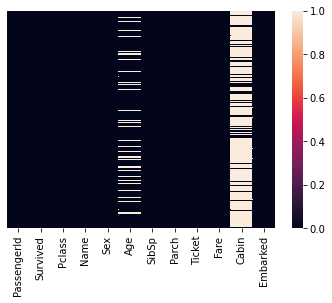

In [9]:
sns.heatmap(train.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

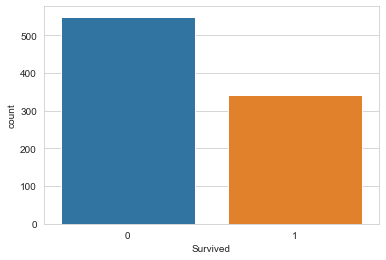

In [14]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

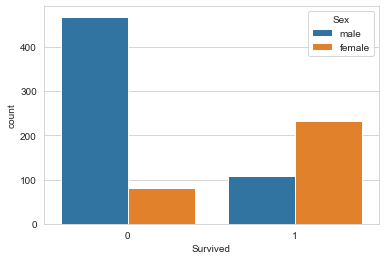

In [17]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue='Sex',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

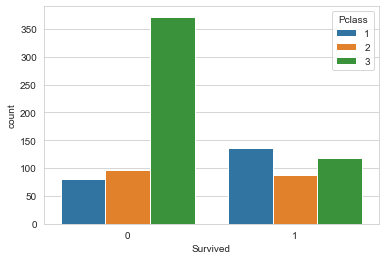

In [18]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue='Pclass',data=train)

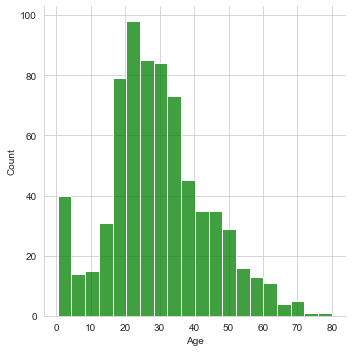

In [23]:
sns.displot(train['Age'].dropna(),kde = False,color='green')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

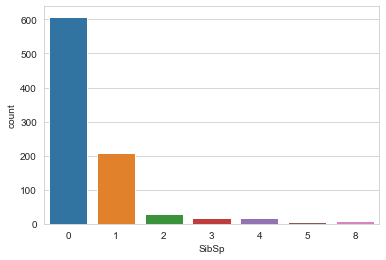

In [26]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

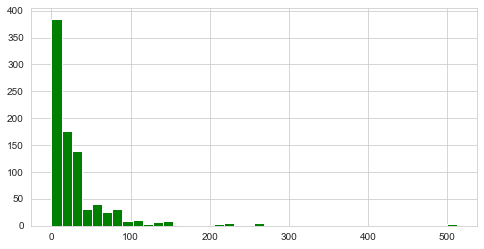

In [28]:
train['Fare'].hist(color = 'green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

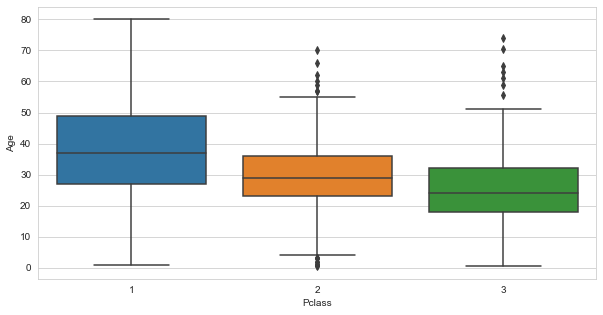

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass',y='Age',data=train)

In [34]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 27
        else:
            return 24
    else:
        return Age

Now apply the function to remove the null values from the age factor

In [42]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

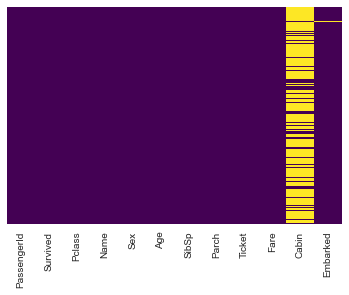

In [43]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

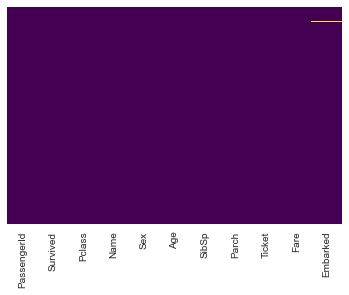

In [45]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24,0,0,373450,8.0500,S


# CONVERTING CATEGORICAL FEATURES

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [49]:
Embarked = pd.get_dummies(train['Embarked'],drop_first=True)
Sex = pd.get_dummies(train['Sex'],drop_first=True)

In [50]:
train.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [55]:
train = pd.concat([train,Sex,Embarked],axis=1)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,37,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1


Now our data is ready to implement on machine learning model